In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.rcsetup as rcsetup
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import csv
import random

housing = pd.read_csv("C:/Users/mjoy/Machine-Learning-Project/train.csv")
#full = pd.read_csv("AmesHousing.csv")


In [10]:
housing.length = housing['YrSold'] - [housing.YearBuilt ]
#length houses in someones possesion


Exception: Data must be 1-dimensional

In [16]:
#get total square footage of house
housing = housing.assign(totalsq = housing.TotalBsmtSF + housing.GrLivArea)

In [18]:
#fill categorical variables that have Na as category
housing.head()
missings = ["Alley", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1", 
"BsmtFinType2", "FireplaceQu", "GarageType","GarageFinish","GarageQual",
"GarageCond", "PoolQC", "Fence","MiscFeature","GarageYrBlt"]
housing[missings] = housing[missings].fillna(value = "None")

In [19]:
housing.isnull().sum()
cols = housing.columns[housing.isnull().any()].tolist()
cols = cols[1:4]
housing = housing.dropna(axis = 0, how = "any", subset = cols)
#Lot Frontage has 259 missing values
#GarageYrBlt has 81 each -> because the property doesn't have a Garage
#MasVnrType and MasVnrArea have 8 missing values each
#Electrical has one missing values=1) & housing


In [15]:
from pandas.api.types import CategoricalDtype

#convert categorical ordinal columns
catcols = ['ExterQual', 'ExterCond', 'BsmtQual',"BsmtCond",
           "BsmtExposure", "HeatingQC",
          "KitchenQual", "FireplaceQu", "GarageType","GarageQual",
          "GarageCond","PoolQC"]
labels = CategoricalDtype(['Ex','Gd','TA','Fa','Po','None'], ordered =True)
# housing[catcols] = housing[catcols].apply(lambda x: x.astype('category'))
# housing[catcols] = housing[catcols].apply(lambda x: x.cat.codes)
housing[catcols].astype('category')

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [245]:
from pandas.api.types import CategoricalDtype

#convert categorical ordinal columns
catcols = ['ExterQual', 'ExterCond', 'BsmtQual',"BsmtCond",
           "BsmtExposure", "HeatingQC",
          "KitchenQual", "FireplaceQu", "GarageType","GarageQual",
          "GarageCond","PoolQC"]

labels = CategoricalDtype(['None','Po', 'Fa','TA','Gd','Ex'], ordered =True)
housing[catcols] = housing[catcols].apply(lambda x: x.astype('category'))


In [252]:
type(housing.PoolQC)

pandas.core.series.Series

In [233]:
housing[catcols] = housing[catcols].apply(lambda x: x.cat.codes)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,totalsq
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,3,None,None,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,3,None,None,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,3,None,None,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,3,None,None,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,3,None,None,0,12,2008,WD,Normal,250000,3343
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,3,MnPrv,Shed,700,10,2009,WD,Normal,143000,2158
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,3,None,None,0,8,2007,WD,Normal,307000,3380
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,3,None,Shed,350,11,2009,WD,Normal,200000,3197
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,3,None,None,0,4,2008,WD,Abnorml,129900,2726
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,3,None,None,0,1,2008,WD,Normal,118000,2068


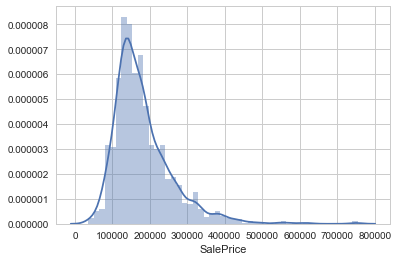

In [208]:
#histogram of sales prices
sns.distplot(housing['SalePrice']);
#we can see it is skewed to left so we need to normalize

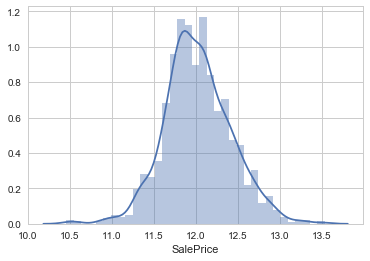

In [209]:
sns.distplot(np.log(housing['SalePrice']))

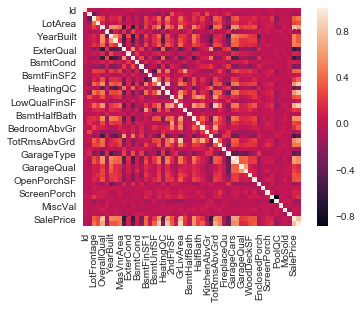

In [210]:
sns.heatmap(housing.corr(), square = True)

In [211]:
#look at correlation of each var to sale price
corr_num = housing.corr()
print (corr_num['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790085
totalsq          0.780006
GrLivArea        0.710073
GarageCars       0.639749
GarageArea       0.622484
TotalBsmtSF      0.613299
1stFlrSF         0.606969
FullBath         0.562710
TotRmsAbvGrd     0.536366
YearBuilt        0.523274
YearRemodAdd     0.507488
MasVnrArea       0.477486
Fireplaces       0.468973
BsmtFinSF1       0.383995
LotFrontage      0.350300
WoodDeckSF       0.324658
2ndFlrSF         0.322840
OpenPorchSF      0.311244
HalfBath         0.282331
LotArea          0.264668
GarageCond       0.246833
BsmtFullBath     0.224988
BsmtUnfSF        0.215707
GarageQual       0.205818
BedroomAbvGr     0.171956
ExterCond        0.116539
ScreenPorch      0.113017
BsmtCond         0.098803
PoolArea         0.093102
3SsnPorch        0.045235
MoSold           0.045085
BsmtFinSF2      -0.010350
BsmtHalfBath    -0.016021
MiscVal         -0.020961
Id              -0.025188
LowQualFinSF    -0.025277
YrSold          -0.026165
OverallCond 

(0, 20000)

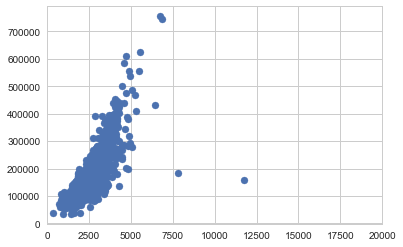

In [212]:
#look at LotArea against Price
fig = plt.figure()
sub1 = fig.add_subplot(111)
sub1.scatter(x = housing.totalsq, y = housing.SalePrice)
sub1.set_xlim(0, 20000)

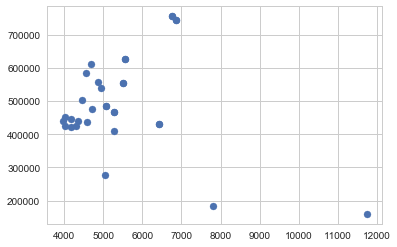

In [213]:
#examinig outliers by computing abs value of zscore and more than 3 sd from mean
total_price = housing[["totalsq", "SalePrice"]]
outliers = total_price[(np.abs(stats.zscore(lot_price)) > 3)]
plt.scatter(x=outliers.totalsq, y = outliers.SalePrice)
plt.show()
#we can see that most of the outliers are for homes ab out 4000 sq ft

In [214]:
#dataframe of only outliers
#outg = pd.merge(housing, outliers, on = ["totalsq", "SalePrice"], how = "inner")

In [215]:
#remove outliers from plot 
new = total_price[(np.abs(stats.zscore(lot_price)) < 3).all(axis=1)]

In [216]:
#merge outlier dataset w/ original dataset for new dataset w/ outliers
housing_out = pd.merge(housing, new, how = "inner", on = ["totalsq","SalePrice"])
housing_out = housing_out[-housing_out.duplicated()]

In [217]:
#convert non-ordinal categorical to dummyvars
housing_dumm = pd.get_dummies(housing)

In [218]:
from fancyimpute import KNN

In [219]:
#impute missing values w/ KNN 
housing_y = housing_dumm.SalePrice
housing_x = housing_dumm.drop(['SalePrice','Id'], axis = 1)
housing_filled = pd.DataFrame(KNN(k=3).complete(housing_x))

Imputing row 1/1451 with 0 missing, elapsed time: 4.185
Imputing row 101/1451 with 1 missing, elapsed time: 4.187
Imputing row 201/1451 with 0 missing, elapsed time: 4.189
Imputing row 301/1451 with 0 missing, elapsed time: 4.191
Imputing row 401/1451 with 0 missing, elapsed time: 4.193
Imputing row 501/1451 with 0 missing, elapsed time: 4.194
Imputing row 601/1451 with 0 missing, elapsed time: 4.196
Imputing row 701/1451 with 0 missing, elapsed time: 4.197
Imputing row 801/1451 with 0 missing, elapsed time: 4.198
Imputing row 901/1451 with 0 missing, elapsed time: 4.199
Imputing row 1001/1451 with 1 missing, elapsed time: 4.200
Imputing row 1101/1451 with 0 missing, elapsed time: 4.201
Imputing row 1201/1451 with 1 missing, elapsed time: 4.202
Imputing row 1301/1451 with 0 missing, elapsed time: 4.203
Imputing row 1401/1451 with 0 missing, elapsed time: 4.204


In [149]:
#check for missing values
housing_filled.isnull().sum().sum()

0

In [186]:
#add response column back to dataset to train randomclassifier
housing.SalePrice = housing_y

In [183]:
#standardize data#check for missing value
from sklearn.preprocessing import StandardScaler
scaler = sklearn.preprocessing.StandardScaler().fit(housing_filled)
x_housing = pd.DataFrame(scaler.fit_transform(housing_filled))

In [199]:
#randomforest classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#create training and test data
train, test = train_test_split(housing, train_size =.8,
                              test_size = .2)
test_y = test.SalePrice
test_x = test.drop('SalePrice', axis =1)
train_y = train.SalePrice
train_x = train.drop('SalePrice', axis =1)

In [200]:
model = RandomForestClassifier()
model.fit(train_x, train_y)
pred = model.predic(test_x)

ValueError: could not convert string to float: 'Normal'

In [185]:
##### from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

#ignore warnings
np.seterr(divide='ignore', invalid='ignore')

#feature union
features = []
features.append(('pca', PCA(n_components = 6)))
features.append(('best_k', SelectKBest(k=4)))
feature_union = FeatureUnion(features)

#estimators for pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('rand_forest', RandomForestClassifier()))
estimators.append(('lasso', Lasso()))
model = Pipeline(estimators)

# evaluate accuracy of pipeline 
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, x_housing, housing_y, cv=kfold)
print(results.mean())

TypeError: All intermediate steps should be transformers and implement fit and transform. 'RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)' (type <class 'sklearn.ensemble.forest.RandomForestClassifier'>) doesn't

In [157]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

#remove features w/ low variance
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
pd.DataFrame(sel.fit_transform(housing_t))

#select features according to k-highest score
sklearn.feature_selection.SelectKBest

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,0.072441,-0.243000,-0.205996,0.656247,-0.520740,1.057250,0.883532,0.509503,-0.786272,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
1,-0.872386,0.376223,-0.090876,-0.067870,2.174601,0.162613,-0.424340,-0.573097,0.659711,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
2,0.072441,-0.119155,0.074297,0.656247,-0.520740,0.990980,0.835093,0.321705,-0.786272,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
3,0.308648,-0.449408,-0.095881,0.656247,-0.520740,-1.858602,-0.714978,-0.573097,0.659711,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,3.656000,-0.052577,-0.087401,-0.118221,-2.150356,-0.302982
4,0.072441,0.541349,0.375612,1.380365,-0.520740,0.957846,0.738213,1.360116,-0.786272,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
5,-0.163766,0.582631,0.361097,-0.791988,-0.520740,0.725903,0.496015,-0.573097,0.659711,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
6,-0.872386,0.169815,-0.042425,1.380365,-0.520740,1.090384,0.980412,0.454268,-0.786272,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
7,0.072441,0.853479,-0.012594,0.656247,0.377707,0.063209,-0.569659,0.752535,0.659711,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
8,-0.163766,-0.820942,-0.439240,0.656247,-0.520740,-1.328447,-1.683773,-0.573097,0.659711,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,3.656000,-0.052577,-0.087401,-0.118221,-2.150356,-0.302982
9,3.143131,-0.862223,-0.309104,-0.791988,0.377707,-1.063370,-1.683773,-0.573097,0.659711,0.365486,...,-0.058803,-0.298897,-0.045517,0.388168,-0.273523,-0.052577,-0.087401,-0.118221,0.465039,-0.302982
